<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-11-13 03:46:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  36.2MB/s    in 1.0s    

2024-11-13 03:46:20 (36.2 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


   ConvertedComp
0        61000.0
1        95179.0
2        90000.0
3       455352.0
4        65277.0


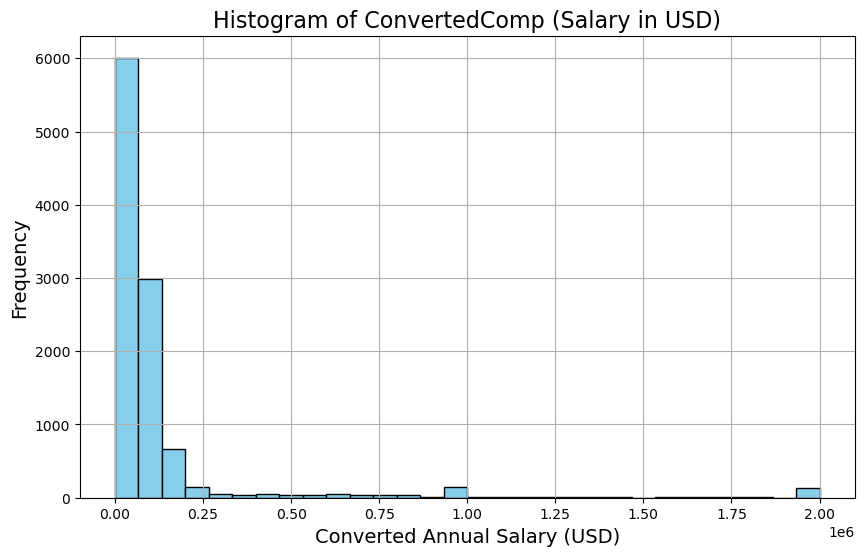

In [19]:
# your code goes here

QUERY = """
SELECT ConvertedComp FROM master
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Inspect the first few rows to ensure data was retrieved correctly
print(df.head())

# Plot histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black')  # Drop NaN values before plotting
plt.title('Histogram of ConvertedComp (Salary in USD)', fontsize=16)
plt.xlabel('Converted Annual Salary (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

### Box Plots


Plot a box plot of `Age.`


    Age
0  22.0
1  23.0
2  28.0
3  26.0
4  29.0


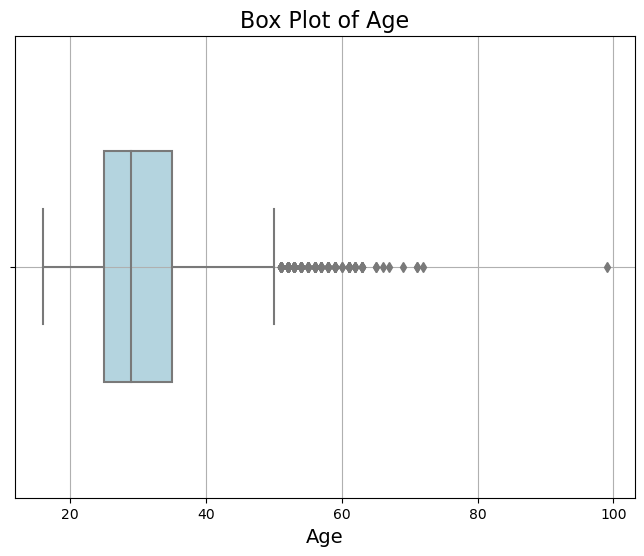

In [25]:
# your code goes here
QUERY = """
SELECT Age FROM master
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Inspect the first few rows to ensure data was retrieved correctly
print(df.head())

# Plot boxplot using seaborn

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'].dropna(), color='lightblue', width=0.5)

# Add title and labels
plt.title('Box Plot of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.grid(True)
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


    Age  WorkWeekHrs
0  22.0         80.0
1  23.0         32.0
2  28.0         40.0
3  26.0         40.0
4  29.0         45.0


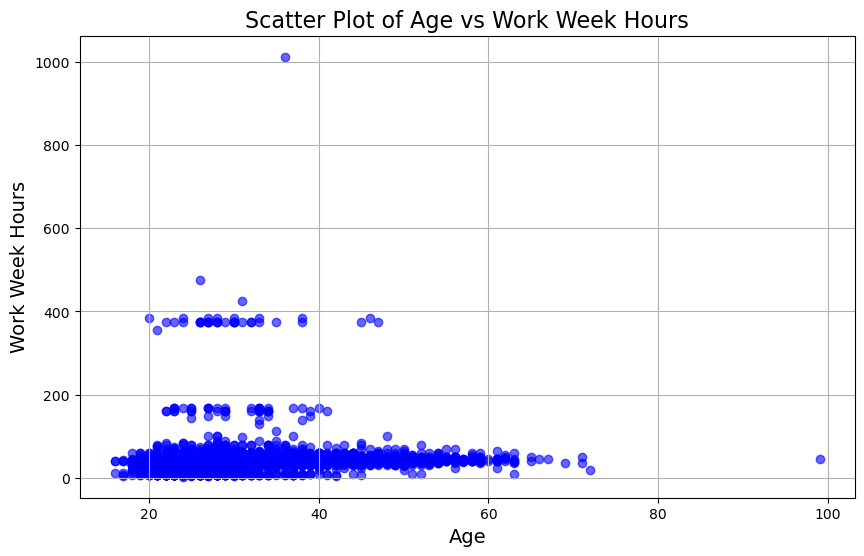

In [27]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Inspect the first few rows to ensure data was retrieved correctly
print(df.head())

# Plot scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], color='blue', alpha=0.6)

# Add title and labels
plt.title('Scatter Plot of Age vs Work Week Hours', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Work Week Hours', fontsize=14)
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


   WorkWeekHrs  CodeRevHrs   Age
0         80.0         NaN  22.0
1         32.0        12.0  23.0
2         40.0         5.0  28.0
3         40.0         NaN  26.0
4         45.0         5.0  29.0


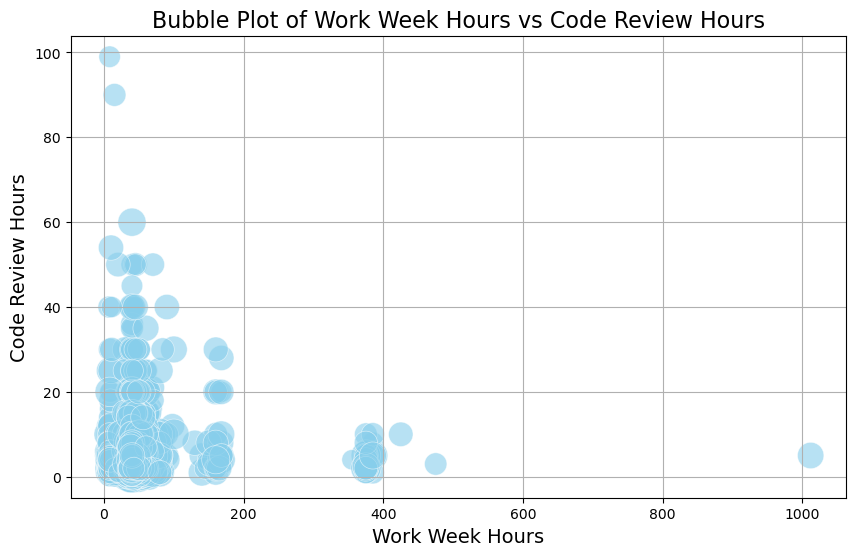

In [29]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Inspect the first few rows to ensure data was retrieved correctly
print(df.head())

bubble_size = df['Age'].fillna(0) * 10  # Scaling factor of 10

# Create the bubble plot
plt.figure(figsize=(10, 6))

# Create scatter plot with bubble size controlled by 'Age'
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=bubble_size, alpha=0.6, color='skyblue', edgecolors="w", linewidth=0.5)

# Add title and labels
plt.title('Bubble Plot of Work Week Hours vs Code Review Hours', fontsize=16)
plt.xlabel('Work Week Hours', fontsize=14)
plt.ylabel('Code Review Hours', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


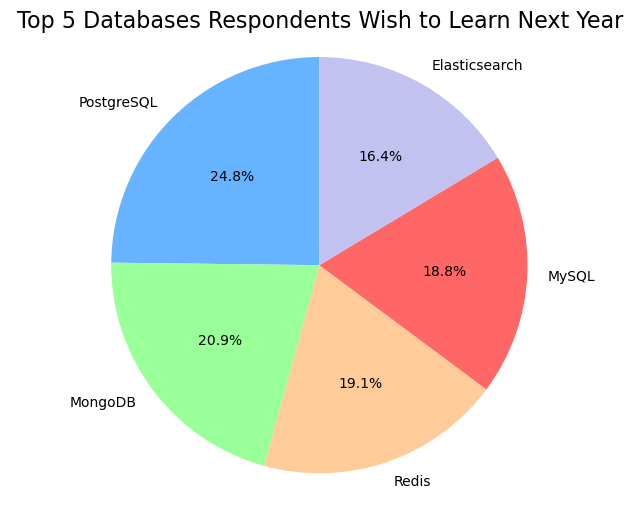

In [43]:
# your code goes here

QUERY = """
SELECT * FROM DatabaseDesireNextYear

"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

top_5_databases = df['DatabaseDesireNextYear'].value_counts().head(5)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0'])

# Add a title
plt.title('Top 5 Databases Respondents Wish to Learn Next Year', fontsize=16)

# Equal aspect ratio ensures that pie chart is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


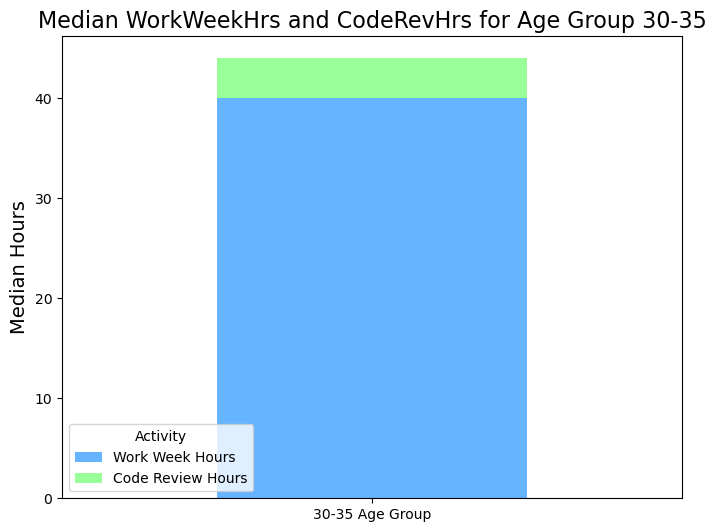

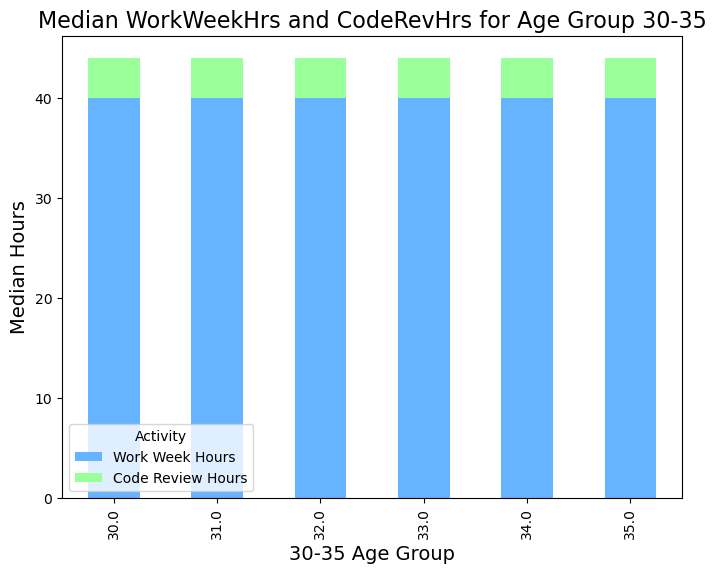

In [52]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Filter for respondents aged 30 to 35
df_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

median_work_week_hrs = df_filtered['WorkWeekHrs'].median()
median_code_rev_hrs = df_filtered['CodeRevHrs'].median()

median_data = pd.DataFrame({
    'WorkWeekHrs': [median_work_week_hrs],
    'CodeRevHrs': [median_code_rev_hrs]
})

df_median = df_filtered.groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

# Plotting the stacked bar chart
median_data.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#66b3ff', '#99ff99'])

# Add title and labels
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35', fontsize=16)
plt.ylabel('Median Hours', fontsize=14)
plt.xticks([0], ['30-35 Age Group'], rotation=0)
plt.legend(title='Activity', labels=['Work Week Hours', 'Code Review Hours'])

# Display the chart
plt.show()

#For each age group 
df_median.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#66b3ff', '#99ff99'])
# Add title and labels
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35', fontsize=16)
plt.ylabel('Median Hours', fontsize=14)
plt.xlabel('30-35 Age Group', fontsize=14)
plt.legend(title='Activity', labels=['Work Week Hours', 'Code Review Hours'])

# Display the chart
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


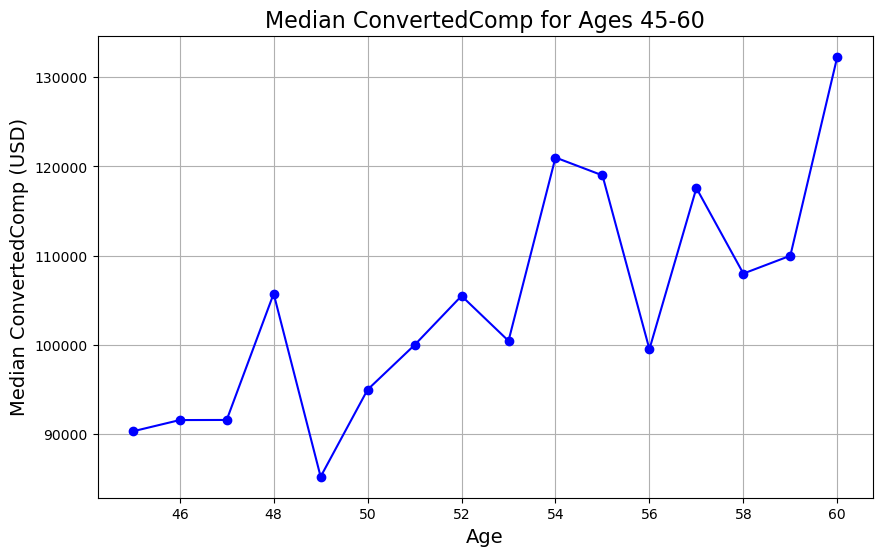

In [55]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp FROM master
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Filter for respondents aged between 45 and 60
df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Group by Age and calculate the median for ConvertedComp
df_median = df_filtered.groupby('Age')['ConvertedComp'].median()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_median.index, df_median.values, marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Median ConvertedComp for Ages 45-60', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Median ConvertedComp (USD)', fontsize=14)

# Display the chart
plt.grid(True)
plt.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
# your code goes here

QUERY = """
SELECT MainBranch FROM master
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Calculate the value counts for MainBranch
mainbranch_counts = df['MainBranch'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue')

# Adding title and labels
plt.title('Distribution of Respondents by Main Branch', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Main Branch', fontsize=14)

# Display the chart
plt.show()







Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
